<H1>Predictiong flight delays - Exploratory Data Analysis</H1>
<H2>Overview of the dataset</H2>

<B>Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings; warnings.simplefilter('ignore')
from pathlib import Path
import glob

<B>Import the data and check data (check on January month)

In [2]:
dir = Path('')
df_01 = (pd.read_csv(f,error_bad_lines=False) for f in dir.glob("*01.csv"))
df_01 = pd.concat(df_01)

In [3]:
df_01.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,4,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN


In [4]:
df_01.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY

The flights are described by 64 variables.

<B>Quick statistics

In [5]:
columns_to_keep = ['UNIQUE_CARRIER','ORIGIN','DEST']
all_files = glob.glob('2016_*.csv')  
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,error_bad_lines=False)
    df = df[columns_to_keep]
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)
del li

b'Skipping line 121012: expected 65 fields, saw 75\n'
b'Skipping line 386249: expected 65 fields, saw 83\nSkipping line 388291: expected 65 fields, saw 78\nSkipping line 389371: expected 65 fields, saw 72\nSkipping line 389548: expected 65 fields, saw 81\n'
b'Skipping line 453858: expected 65 fields, saw 97\n'


In [6]:
df.shape

(5635978, 3)

<B>Data selection

The variables below will be used in this notebook:
<ul>
    <li><b>DAY_OF_MONTH: </b>date of the flight
    <li><b>MONTH: </b>month of the flight
    <li><b>UNIQUE_CARRIER: </b>Airline carrier
    <li><b>ORIGIN: </b>Departure Airport
    <li><b>DEST: </b> Destination
    <li><b>CRS_DEP_TIME: </b>Planned Departure time
    <li><b>CRS_ARR_TIME: </b>Planned Arrival time
    <li><b>DEP_DELAY: </b>Departure delay, in minutes
    <li><b>ARR_DELAY: </b>Arrival delay, in minutes
    <li><b>CANCELLED: </b>was the flight cancelled
    <li><b>DIVERTED: </b> was the flight diverted
    <li><b>CARRIER_DELAY: </b>in minutes
    <li><b>WEATHER_DELAY: </b>in minutes
    <li><b>NAS_DELAY: </b>in minutes
    <li><b>SECURITY_DELAY: </b>in minutes
    <li><b>LATE_AIRCRAFT_DELAY: </b>in minutes
</ul>

In [7]:
columns_to_keep = ['DAY_OF_MONTH','MONTH','UNIQUE_CARRIER','ORIGIN','DEST','CRS_DEP_TIME','CRS_ARR_TIME','DEP_DELAY','ARR_DELAY','CANCELLED','DIVERTED','CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']

In [8]:
all_files = ["2016_01.csv","2016_02.csv","2016_03.csv","2016_04.csv","2016_05.csv","2016_06.csv"]
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0,error_bad_lines=False)

    df = df[columns_to_keep]
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)
del li

b'Skipping line 121012: expected 65 fields, saw 75\n'
b'Skipping line 386249: expected 65 fields, saw 83\nSkipping line 388291: expected 65 fields, saw 78\nSkipping line 389371: expected 65 fields, saw 72\nSkipping line 389548: expected 65 fields, saw 81\n'
b'Skipping line 453858: expected 65 fields, saw 97\n'


<B>Cleaning

In [9]:
df.head(5)

,DAY_OF_MONTH,MONTH,UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,6,1,AA,DFW,DTW,1100.0,1438.0,-3.0,-6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,7,1,AA,DFW,DTW,1100.0,1438.0,-4.0,-12.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,8,1,AA,DFW,DTW,1100.0,1438.0,-5.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,9,1,AA,DFW,DTW,1100.0,1438.0,2.0,-5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,10,1,AA,DFW,DTW,1100.0,1438.0,100.0,113.0,0.0,0.0,0.0,0.0,47.0,0.0,66.0


<b>Data checking</b>

In [10]:
# Check unique values in DAY_OF_MONTH column
df.DAY_OF_MONTH.unique()

array([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 1, 2, 3, 4, 5, '2', '3', '1', 'EV',
       '6', '15', '13', '12', '20', '8', '29', '31', '11', '21', '17',
       '28', '19', '27', '25', '10', '24', '22', '14', '18', '26', '7',
       '5', '4', '9', '23', '16', '30'], dtype=object)

In [11]:
df_wrong_data = df[ df['DAY_OF_MONTH'] == 'EV' ] # Step 1
df = df.drop(df_wrong_data.index, axis=0) # Step 2
del df_wrong_data

In [12]:
len(df['UNIQUE_CARRIER'].drop_duplicates())

12

In [13]:
len(df['ORIGIN'].drop_duplicates())

309

<b>Filling factor: missing values</b>

In [14]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CARRIER_DELAY,2333984,16.517668
1,WEATHER_DELAY,2333984,16.517668
2,NAS_DELAY,2333984,16.517668
3,SECURITY_DELAY,2333984,16.517668
4,LATE_AIRCRAFT_DELAY,2333984,16.517668
5,ARR_DELAY,41933,98.500133
6,DEP_DELAY,33733,98.793432
7,DIVERTED,4,99.999857
8,CRS_ARR_TIME,3,99.999893
9,CANCELLED,3,99.999893


In [15]:
del missing_df

In [16]:
df['ARR_DELAY'] = df['ARR_DELAY'].fillna(0)
df['DEP_DELAY'] = df['DEP_DELAY'].fillna(0)
df['CARRIER_DELAY'] = df['CARRIER_DELAY'].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)
df['NAS_DELAY'] = df['NAS_DELAY'].fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)

In [17]:
df.dropna(inplace = True)

In [18]:
df.isnull().sum()

DAY_OF_MONTH           0
MONTH                  0
UNIQUE_CARRIER         0
ORIGIN                 0
DEST                   0
CRS_DEP_TIME           0
CRS_ARR_TIME           0
DEP_DELAY              0
ARR_DELAY              0
CANCELLED              0
DIVERTED               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
dtype: int64

In [19]:
# Check unique values in CANCELLED column
df.CANCELLED.unique()

array([0., 1.])

In [20]:
df_wrong_data = df[ df['CANCELLED'] == 313 ] # Step 1
df = df.drop(df_wrong_data.index, axis=0) # Step 2

<b>Type convertion

In [21]:
df['DAY_OF_MONTH'] = df['DAY_OF_MONTH'].astype(int)
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].astype(int)
df['ARR_DELAY'] = df['ARR_DELAY'].astype(int)
df['DEP_DELAY'] = df['DEP_DELAY'].astype(int)
df['CANCELLED'] = df['CANCELLED'].astype(int)
df['DIVERTED'] = df['DIVERTED'].astype(int)

In [22]:
df = df.rename(columns={'DAY_OF_MONTH': 'DAY'})
df['YEAR'] = 2016
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])
df = df.drop(['YEAR','DAY'], axis = 1)

<b>Correlation

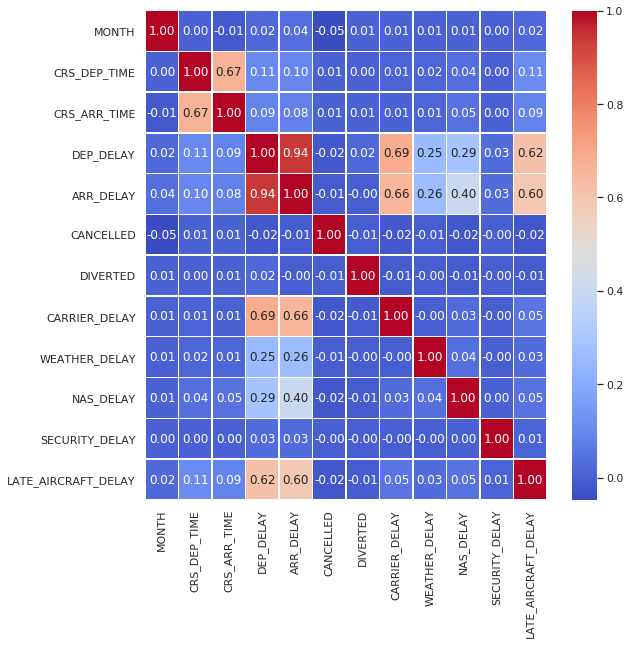

In [23]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax,cmap="coolwarm")
plt.show()

<H2>Comparing airlines</H2>

<b>Airlines Companies list</b>

In [24]:
# Check unique values in UNIQUE_CARRIER (airline) column
df.UNIQUE_CARRIER.unique()

array(['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'NK', 'EV', 'OO', 'UA', 'VX',
       'WN'], dtype=object)

In [25]:
# Renaming airline codes to company names
# Source: https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States
df['UNIQUE_CARRIER'].replace({
    'DL':'Delta Airlines',
    'AA':'American Airlines',
    'AS':'Alaska Airlines',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'OO':'SkyWest Airlines',
    'UA':'United Airlines',
    'HA':'Hawaiian Airlines',
    'NK':'Spirit Airlines'
},inplace=True)

In [26]:
# Quality check
df.UNIQUE_CARRIER.unique()

array(['American Airlines', 'Alaska Airlines', 'JetBlue Airways',
       'Delta Airlines', 'Frontier Airlines', 'Hawaiian Airlines',
       'Spirit Airlines', 'ExpressJet', 'SkyWest Airlines',
       'United Airlines', 'Virgin America', 'Southwest Airlines'],
      dtype=object)

<B> % of flights per company

Text(0, 0.5, '')

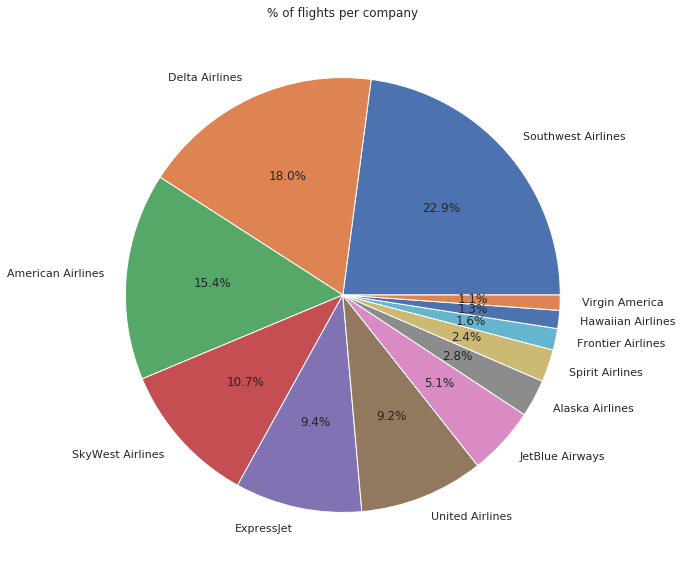

In [27]:
df.UNIQUE_CARRIER.value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('% of flights per company')
plt.xlabel("")
plt.ylabel("")

<H2>Flights status</H2>

In [28]:
#Status represents wether the flight was on time (0), slightly delayed (1), hightly delayed (2), diverted (3), or cancelled (4)
for dataset in df:
    df.loc[df['DEP_DELAY'] < 15, 'STATUS'] = 0
    df.loc[df['DEP_DELAY'] >= 15, 'STATUS'] = 1
    df.loc[df['DEP_DELAY'] >= 60, 'STATUS'] = 2
    df.loc[df['CANCELLED'] == 1, 'STATUS'] = 3
    df.loc[df['DIVERTED'] == 1, 'STATUS'] = 4

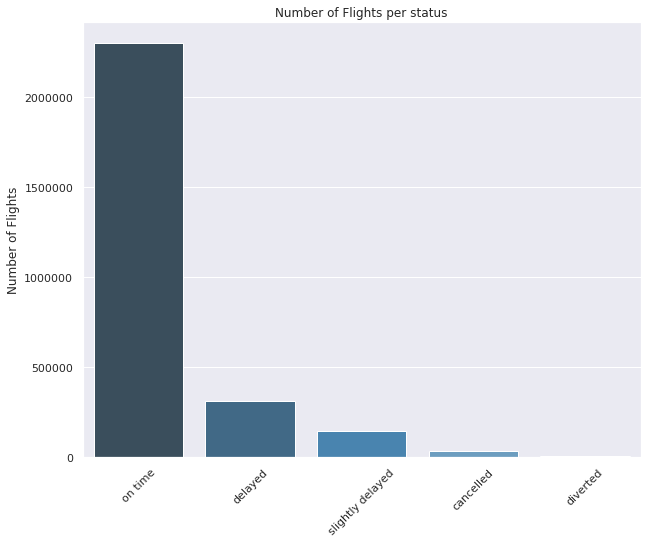

In [29]:
f,ax=plt.subplots(1,1,figsize=(10,8))
sns.countplot('STATUS', data=df,ax=ax,palette = 'Blues_d')
status = ['on time', 'delayed','slightly delayed','cancelled','diverted']
ax.set_title('Number of Flights per status')
ax.set_ylabel('Number of Flights')
ax.set_xlabel('')
ax.set_xticklabels(status, rotation = 45)
plt.show()

<H2>Canceled flights exploration</H2>

In [30]:
# Total number of canceled flights
df.CANCELLED.sum()

34933

In [31]:
canceled = df[(df['CANCELLED'] > 0)]
canceled.head(3)

,MONTH,UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DEP_DELAY,ARR_DELAY,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DATE,STATUS
72,1,American Airlines,SEA,JFK,640,1501.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,2016-01-16,3.0
79,1,American Airlines,SEA,JFK,640,1501.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,2016-01-23,3.0
80,1,American Airlines,SEA,JFK,645,1506.0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,2016-01-24,3.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

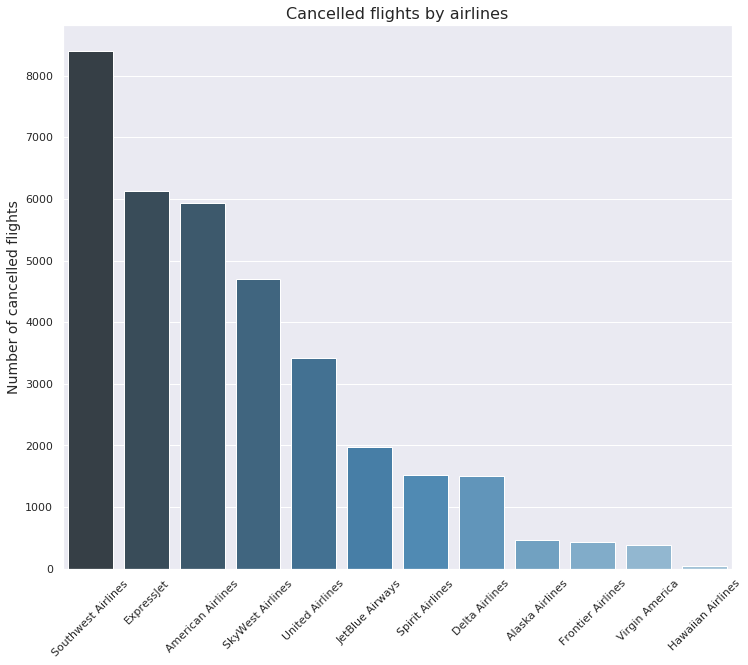

In [32]:
# Number of cancelled flights per month
plt.figure(figsize=(12,10))
sns.countplot('UNIQUE_CARRIER',data=canceled,order = canceled['UNIQUE_CARRIER'].value_counts().index,palette = 'Blues_d')
plt.title('Cancelled flights by airlines', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of cancelled flights', fontsize=14)
plt.xticks(rotation=45)

<b>Conclusion</b><BR>
Canceled flights are not delayed flights
We can filter out Canceled Flights for out analysis

In [33]:
# Leaving only non-canceled flights
df = df[(df['CANCELLED'] == 0)]
df = df.drop('CANCELLED', axis = 1)
# Same for diverted flights
df = df[(df['DIVERTED'] == 0)]
df = df.drop('DIVERTED', axis = 1)

<H2>Delayed flights reasons</H2>

Text(0, 0.5, '')

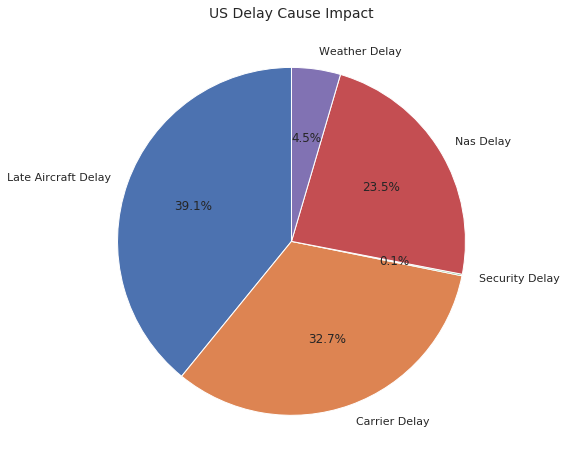

In [34]:
tot_aircraft = df.LATE_AIRCRAFT_DELAY.sum()
tot_carrier = df.CARRIER_DELAY.sum()
tot_security = df.SECURITY_DELAY.sum()
tot_nas = df.NAS_DELAY.sum()
tot_weather = df.WEATHER_DELAY.sum()
tot_d = {'Late Aircraft Delay': tot_aircraft,'Carrier Delay': tot_carrier,'Security Delay': tot_security,'Nas Delay': tot_nas,'Weather Delay': tot_weather}
fig = plt.figure(figsize=(8,8))
labels = tot_d.keys()
plt.pie(tot_d.values(),autopct='%1.1f%%',labels = labels,startangle = 90, pctdistance=0.6)
plt.title('US Delay Cause Impact', fontsize=14)
plt.xlabel("")
plt.ylabel("")

<H2>Delays per companies</H2>

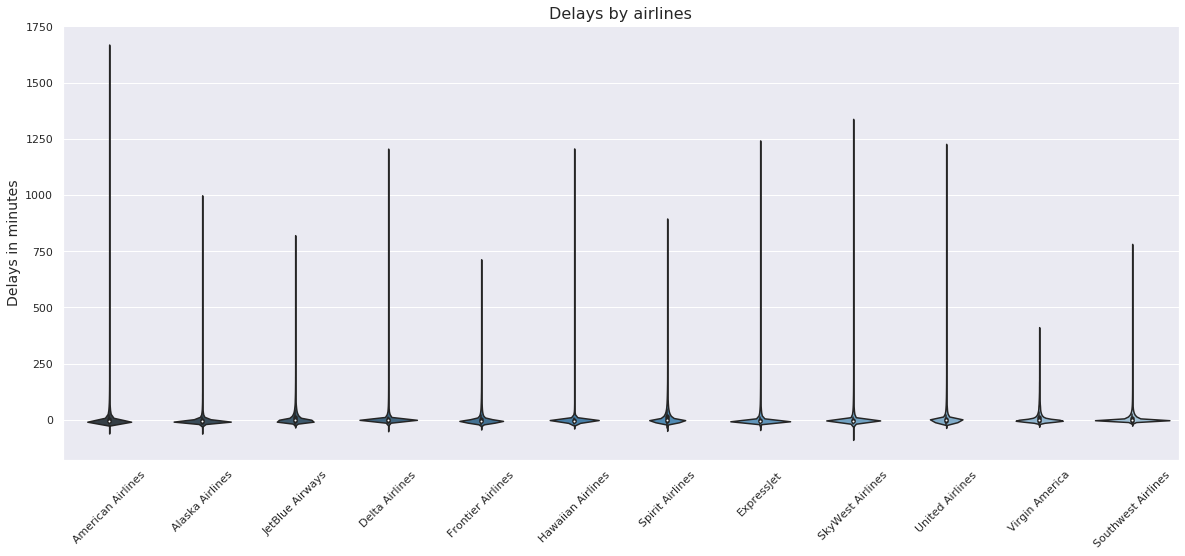

In [35]:
plt.figure(figsize = (20, 8))
plt.title('Delays by airlines', fontsize=16)
sns.violinplot('UNIQUE_CARRIER', 'DEP_DELAY', data = df,palette = 'Blues_d')
plt.xlabel('')
plt.ylabel('Delays in minutes', fontsize=14)
xt = plt.xticks(rotation=45)

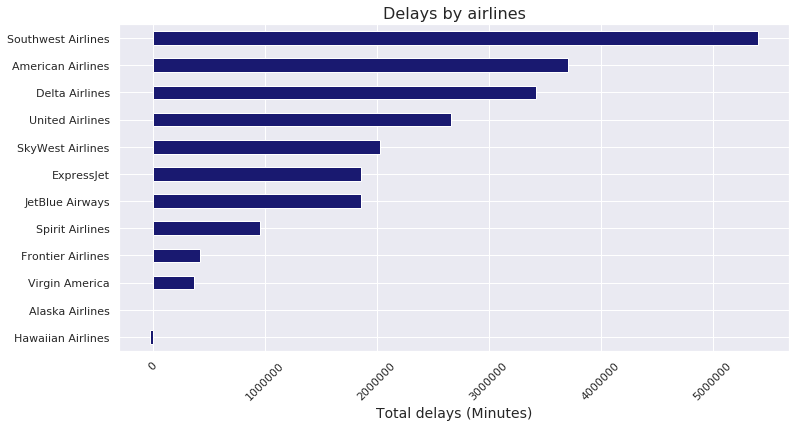

In [36]:
# Delays by airlines
plt.figure(figsize=(12,6))
df.groupby('UNIQUE_CARRIER').DEP_DELAY.sum().sort_values(ascending=True).plot.barh(color='midnightblue')
plt.title('Delays by airlines', fontsize=16)
plt.xlabel('Total delays (Minutes)', fontsize=14)
plt.ylabel('', fontsize=14)
xt = plt.xticks(rotation=45)
plt.show()

<H2>Delays: take-off or landing ?</H2>

In the previous section, all the discussion was done on departure delays. However, these delays differ somewhat from the delays recorded at arrival:

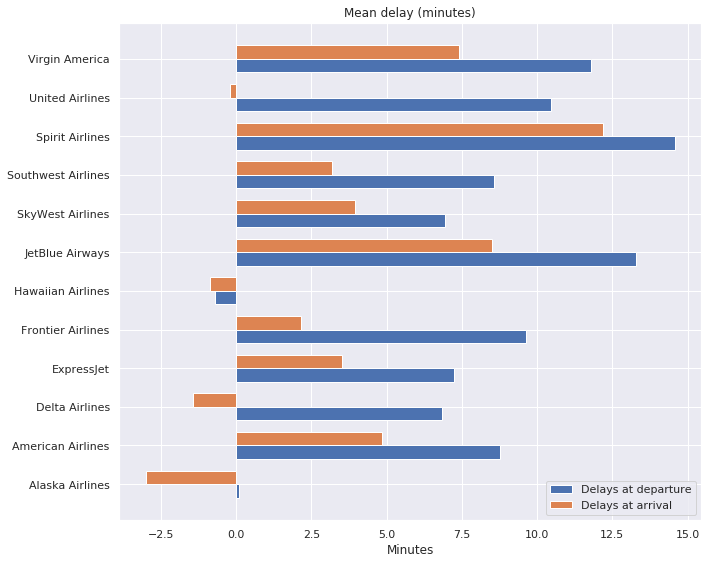

In [37]:
temp = df.groupby('UNIQUE_CARRIER').agg(
    {
         'ARR_DELAY':'mean',    
         'DEP_DELAY':'mean' 
    }
)
temp = temp.reset_index()

airlines = temp.UNIQUE_CARRIER.array
dep_delays = temp.DEP_DELAY.array
arr_delays = temp.ARR_DELAY.array

x = np.arange(len(airlines))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.barh(x - width/2, dep_delays, width, label='Delays at departure')
rects2 = ax.barh(x + width/2, arr_delays, width, label='Delays at arrival')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Minutes')
ax.set_title('Mean delay (minutes)')
ax.set_yticks(x)
ax.set_yticklabels(airlines)
ax.legend()

fig.tight_layout()

plt.show()

On this figure, we can see that delays at arrival are generally lower than at departure. This indicates that airlines adjust their flight speed in order to reduce the delays at arrival. So for our project, we will just consider the delays at departure.

In [38]:
df = df.drop('ARR_DELAY', axis = 1)

If a number is positive = flight delayed
Since that we’re exploring only delayed flights, non-delayed should be disregarded
The danger of keeping those is if we summarise for plotting for example, we’ll get false data
Sum of Delayed minutes will be less because of the negative numbers that will subtract the real delays

<H2>Delayed flights classification</H2>

In [39]:
df_delay = df[(df['DEP_DELAY'] > 0)]
df_delay.head(5)

,MONTH,UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ARR_TIME,DEP_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DATE,STATUS
3,1,American Airlines,DFW,DTW,1100,1438.0,2,0.0,0.0,0.0,0.0,0.0,2016-01-09,0.0
4,1,American Airlines,DFW,DTW,1100,1438.0,100,0.0,0.0,47.0,0.0,66.0,2016-01-10,2.0
5,1,American Airlines,DFW,DTW,1100,1438.0,7,0.0,0.0,0.0,0.0,0.0,2016-01-11,0.0
13,1,American Airlines,DFW,DTW,1100,1438.0,14,0.0,0.0,0.0,0.0,0.0,2016-01-19,0.0
15,1,American Airlines,DFW,DTW,1100,1438.0,34,0.0,21.0,0.0,0.0,0.0,2016-01-21,1.0


In [40]:
#Status represents wether the flight was on time (0), slightly delayed (1), delayed (2), highly delayed (3)
for dataset in df:
    df.loc[df['DEP_DELAY'] < 0, 'STATUS'] = 0
    df.loc[df['DEP_DELAY'] >= 0, 'STATUS'] = 1
    df.loc[df['DEP_DELAY'] >= 15, 'STATUS'] = 2
    df.loc[df['DEP_DELAY'] >= 60, 'STATUS'] = 3

In [41]:
delayed_pct = df.groupby('STATUS').agg({'UNIQUE_CARRIER':'count'})
delayed_pct['UNIQUE_CARRIER'] = delayed_pct['UNIQUE_CARRIER']/delayed_pct['UNIQUE_CARRIER'].sum()
delayed_pct = delayed_pct.rename(columns={'UNIQUE_CARRIER': 'percentage'})
delayed_pct

,percentage
STATUS,
0.0,0.604013
1.0,0.230310
2.0,0.113033
3.0,0.052643


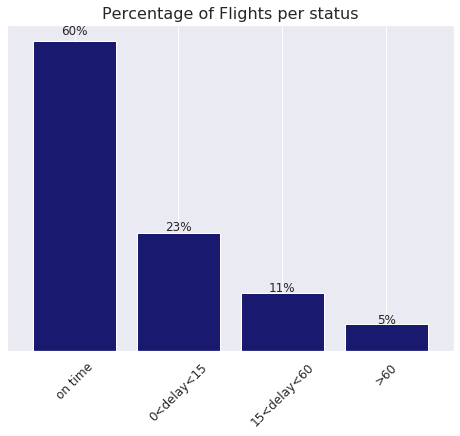

In [42]:
ax = delayed_pct.plot(kind='bar',figsize=(8,6),width = 0.8,color='midnightblue',edgecolor=None)
status = ['on time', '0<delay<15', '15<delay<60','>60']
plt.title("Percentage of Flights per status",fontsize= 16)
plt.xticks(fontsize=12)
plt.yticks([])
plt.xlabel('')
ax.set_xticklabels(status, rotation = 45)
ax.get_legend().remove()
# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

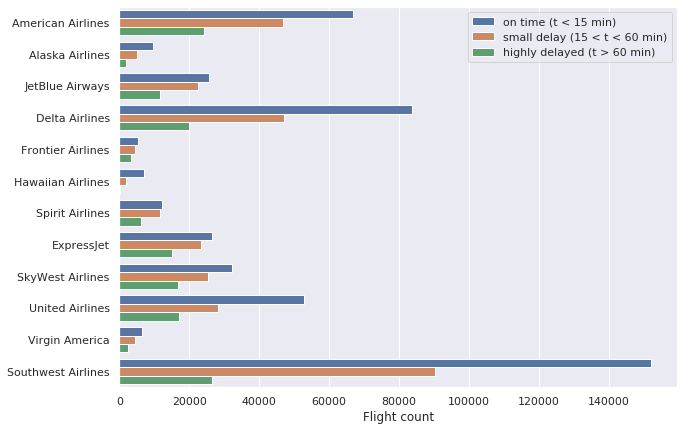

In [43]:
fig = plt.figure(1,figsize=(10,7))
ax = sns.countplot(y='UNIQUE_CARRIER',hue='STATUS',data=df_delay)
plt.xlabel('Flight count')
plt.ylabel('')
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 15 min)')
L.get_texts()[1].set_text('small delay (15 < t < 60 min)')
L.get_texts()[2].set_text('highly delayed (t > 60 min)')
plt.show()

<H2>Relation between the origin airport and delays

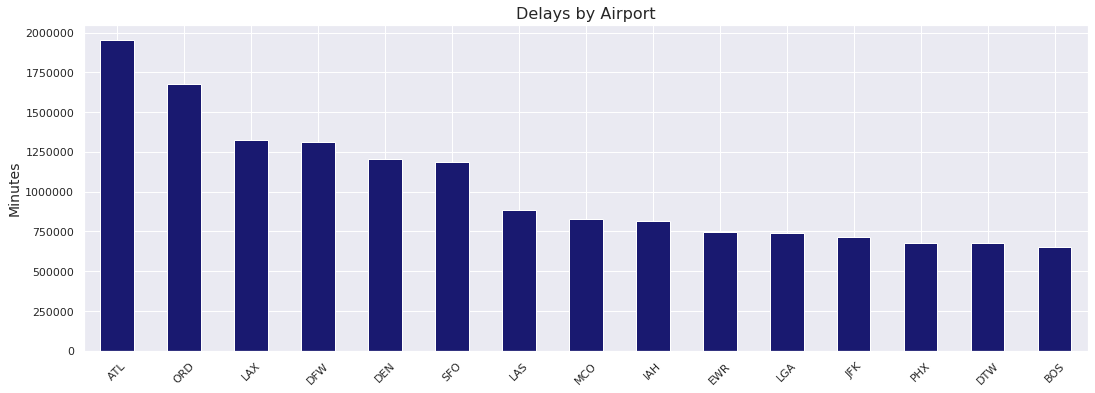

In [44]:
city_by_delay = df_delay.groupby('ORIGIN').DEP_DELAY.sum().sort_values(ascending=False)
plt.figure(figsize=(18, 6))
city_by_delay[:15].plot.bar(color='midnightblue')
plt.title('Delays by Airport', fontsize=16)
plt.xlabel('')
plt.ylabel('Minutes', fontsize=14)
xt = plt.xticks(rotation=45)
plt.show()

<H2>Temporal variability of delays

<B>Delays per MONTH

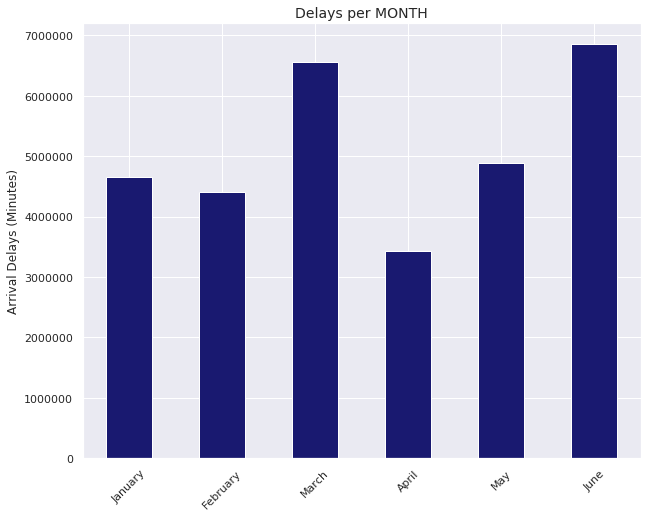

In [45]:
f,ax=plt.subplots(figsize=(10,8))
df_delay.groupby('MONTH').DEP_DELAY.sum().plot.bar(color='midnightblue').set_title('Delays by MONTH')
month = ['January', 'February', 'March', 'April','May','June','July','August','September','October','November','December']
ax.set_xticklabels(month, rotation = 45)
ax.set_title('Delays per MONTH', fontsize=14)
ax.set_ylabel('Arrival Delays (Minutes)')
ax.set_xlabel('')
plt.show()

<B>Delays per WEEKDAY

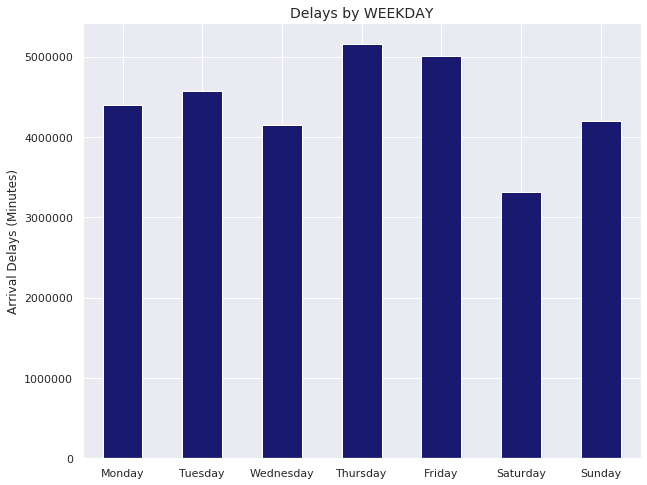

In [46]:
f,ax=plt.subplots(1,1,figsize=(10,8))
df_delay['DAY_OF_WEEK'] = df_delay['DATE'].dt.weekday
df_delay.groupby('DAY_OF_WEEK').DEP_DELAY.sum().plot.bar(color='midnightblue').set_title('Delays by WEEKDAY')
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax.set_xticklabels(weekday,rotation =360)
ax.set_title('Delays by WEEKDAY', fontsize=14)
ax.set_ylabel('Arrival Delays (Minutes)')
ax.set_xlabel('')
plt.show()